# Unsupervised Learning


Unsupervised learning is a type of machine learning that works with unlabeled data to discover hidden patterns, structures, and relationships within it, without any human supervision or prior knowledge of the desired output.

Unlike supervised learning, where models are trained on data with predefined labels, unsupervised learning algorithms must infer their own rules and organize information based on similarities, differences, and inherent characteristics of the data.

Common tasks include clustering (grouping similar data points), association (finding relationships between items), and dimensionality reduction (simplifying data by reducing features).

## K-Means

K-Means is a popular unsupervised learning algorithm used for clustering data. It aims to partition a dataset into a pre-defined number of "K" distinct groups (clusters), where each data point belongs to the cluster whose mean (centroid) it is closest to. The algorithm iteratively refines these cluster assignments and centroid positions to minimize the total squared distance between data points and their respective cluster centroids.

In [ ]:
# Import the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### K-Means on a synthetic data set

Let's generate random clusters of points by using the `make_blobs` class. It can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b> centres </b>: The number of centres to generate, or the fixed centre locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul>
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>

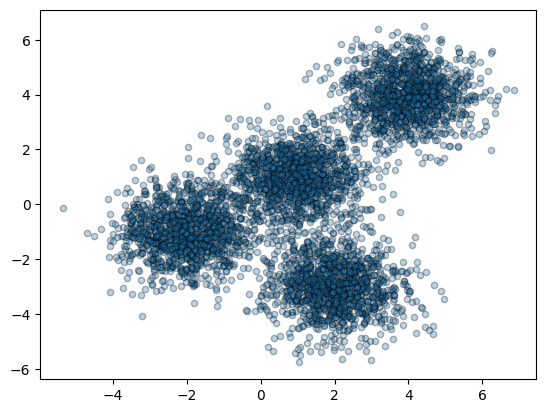

In [ ]:
np.random.seed(0)

X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

#### Set up the K-Means

The KMeans class has many parameters that can be used, but we will be using these three:

- `init`: Initialization method of the centroids.
  - Value will be: `k-means++`
  - `k-means++`: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence.
- `n_clusters`: The number of clusters to form as well as the number of centroids to generate.
  -  Value will be: 4 (since we have 4 centres)
- `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
   - Value will be: 12  

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [ ]:
# Fit the Model

k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [ ]:
# Label each point in the model using the k_means.labels_ attribute.

k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [ ]:
# Get the coordinates of the cluster centers using k_means.cluster_centers_

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

##### Visual Plot

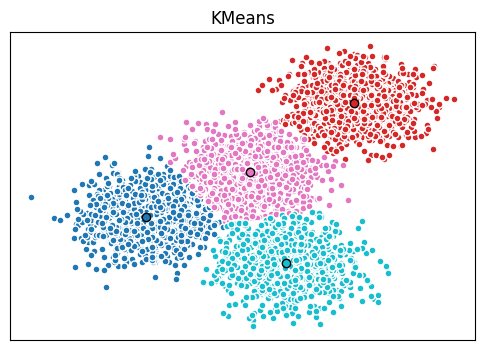

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

### Customer Segmentation with k-means

Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources.

#### DATA

In [ ]:
cust_df = pd.read_csv("https://raw.githubusercontent.com/ElsonFilho/Python_ML/refs/heads/main/data/Cust_Segmentation.csv")
cust_df.sample(10)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
76            77   43    1               8      45      0.677       0.808   
389          390   37    1               3      25      0.276       0.649   
766          767   38    2               7      64      0.651       1.269   
34            35   28    1              12      45      1.854       1.611   
359          360   21    1               1      18      0.159       2.955   
180          181   39    2               2      46      4.004       3.356   
47            48   30    1               4      21      0.229       0.506   
515          516   46    1               9      31      1.617       2.661   
820          821   37    1               4      24      0.419       2.989   
791          792   53    1              33     324      7.053      15.627   

     Defaulted Address  DebtIncomeRatio  
76         0.0  NBA011              3.3  
389        0.0  NBA003              3.7  
766        0.0  NBA004              3.0  
34         0.0  NBA007              7.7  
359        0.0  NBA001             17.3  
180        1.0  NBA012             16.0  
47         NaN  NBA002              3.5  
515        0.0  NBA023             13.8  
820        NaN  NBA010             14.2  
791        NaN  NBA025              7.0

In [ ]:
N_observations, N_features = cust_df.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 850
Number of Features: 10


In [ ]:
# Remove Adress and Customer ID and obs with missings.
features_to_remove = ['Address', 'Customer Id']
cust_df = cust_df.drop(features_to_remove , axis=1)

cust_df = cust_df.dropna()

N_observations, N_features = cust_df.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 700
Number of Features: 8


In [ ]:
# Normalizing over the standard deviation.

X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

#### Modeling

In [ ]:
# K = 3

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_

cust_df["Clus_km"] = labels

cust_df.groupby('Clus_km').mean()

Age       Edu  Years Employed      Income  Card Debt  \
Clus_km                                                               
0        34.301370  1.625571        8.054795   38.036530   0.827934   
1        41.733333  1.952381       16.723810  100.076190   4.801952   
2        31.821656  1.840764        3.745223   30.273885   1.405452   

         Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                          
0          1.884808   0.000000         7.772603  
1          8.674514   0.257143        15.740952  
2          2.575586   0.993631        13.536306

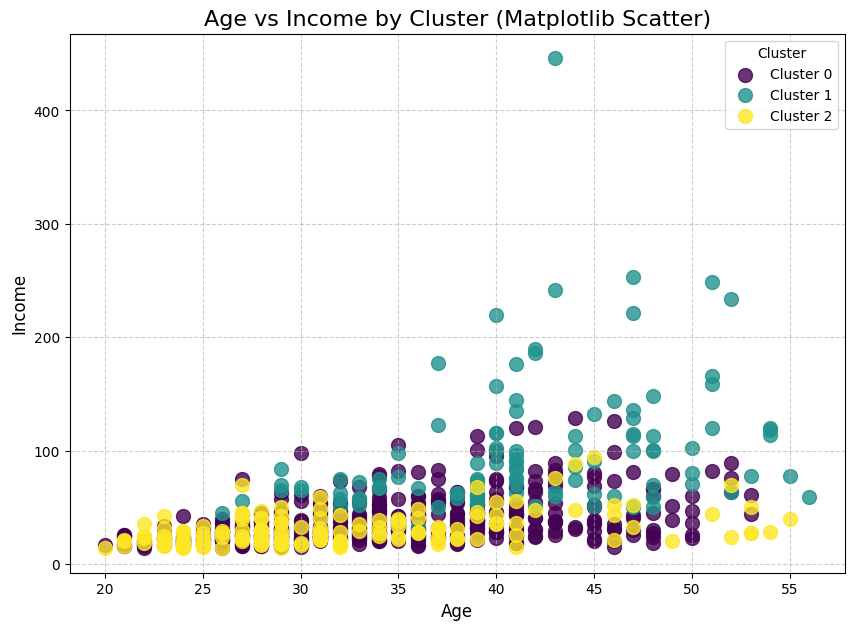

In [ ]:
# Age vs Income by Cluster

plt.figure(figsize=(10, 7))

# Get unique cluster labels
unique_clusters = sorted(cust_df['Clus_km'].unique())

# Define a colormap for consistent colors
cmap = plt.cm.get_cmap('viridis', len(unique_clusters))

for i, cluster_label in enumerate(unique_clusters):
    cluster_data = cust_df[cust_df['Clus_km'] == cluster_label]
    plt.scatter(
        cluster_data['Age'],
        cluster_data['Income'],
        color=cmap(i), # Assign color from colormap
        label=f'Cluster {cluster_label}', # Label for legend
        s=100,
        alpha=0.8
    )

plt.title('Age vs Income by Cluster (Matplotlib Scatter)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Create interactive 3D scatter plot

cust_df['Clus_km'] = cust_df['Clus_km'].astype(str)

fig = px.scatter_3d(
    cust_df,
    x='Age',
    y='Income',
    z='Edu',
    color='Clus_km', # Color points by their cluster assignment
    opacity=0.7,      # Adjust transparency
    title='3D Customer Segmentation: Age vs Income vs Education by Cluster',
    labels={'Clus_km': 'Cluster'} # Custom label for the legend
)

# You can further customize the layout if needed
fig.update_layout(
    scene = dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Education (Years)'
    ),
    margin=dict(l=0, r=0, b=0, t=50) # Adjust margins
)

# Show the interactive plot
fig.show()

## DBSCAN and HDBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points that are closely packed, marking as outliers points that lie alone in low-density regions. It identifies clusters as dense regions in the data space separated by areas of lower density, and it can find arbitrarily-shaped clusters and effectively handle noise.

**HDBSCAN** (Hierarchical Density-Based Spatial Clustering of Applications with Noise) extends DBSCAN by building a hierarchical structure of clusters from varying density thresholds, allowing it to discover clusters of different densities and automatically determine the optimal number of clusters without needing to specify a fixed epsilon parameter.


In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler

# geographical tools
!pip install contextily==1.6.2
import contextily as ctx  # used for obtianing a basemap of Canada
import geopandas as gpd  # pandas dataframe-like geodataframes for geographical data
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.6 MB/s eta 0:00:00


In [ ]:
# Download the Canada map for reference

import requests
import zipfile
import io
import os

# URL of the ZIP file on the cloud server
zip_file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/YcUk-ytgrPkmvZAh5bf7zA/Canada.zip'

# Directory to save the extracted TIFF file
output_dir = './'
os.makedirs(output_dir, exist_ok=True)

# Step 1: Download the ZIP file
response = requests.get(zip_file_url)
response.raise_for_status()  # Ensure the request was successful
# Step 2: Open the ZIP file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # Step 3: Iterate over the files in the ZIP
    for file_name in zip_ref.namelist():
        if file_name.endswith('.tif'):  # Check if it's a TIFF file
            # Step 4: Extract the TIFF file
            zip_ref.extract(file_name, output_dir)
            print(f"Downloaded and extracted: {file_name}")

Downloaded and extracted: Canada.tif


In [ ]:
# Function that plots clustered locations and overlays them on a basemap.

def plot_clustered_locations(df,  title='Museums Clustered by Proximity'):
    """
    Plots clustered locations and overlays on a basemap.

    Parameters:
    - df: DataFrame containing 'Latitude', 'Longitude', and 'Cluster' columns
    - title: str, title of the plot
    """

    # Load the coordinates intto a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326")

    # Reproject to Web Mercator to align with basemap
    gdf = gdf.to_crs(epsg=3857)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Separate non-noise, or clustered points from noise, or unclustered points
    non_noise = gdf[gdf['Cluster'] != -1]
    noise = gdf[gdf['Cluster'] == -1]

    # Plot noise points
    noise.plot(ax=ax, color='k', markersize=30, ec='r', alpha=1, label='Noise')

    # Plot clustered points, colured by 'Cluster' number
    non_noise.plot(ax=ax, column='Cluster', cmap='tab10', markersize=30, ec='k', legend=False, alpha=0.6)

    # Add basemap of  Canada
    ctx.add_basemap(ax, source='./Canada.tif', zoom=4)

    # Format plot
    plt.title(title, )
    plt.xlabel('Longitude', )
    plt.ylabel('Latitude', )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()

    # Show the plot
    plt.show()

### DATA

Data source: The Open Database of Cultural and Art Facilities (ODCAF)
A collection of open data containing the names, types, and locations of cultural and art facilities across Canada. It is released under the Open Government License - Canada. The different types of facilities are labeled under 'ODCAF_Facility_Type'.

Landing page:
https://www.statcan.gc.ca/en/lode/databases/odcaf

link to zip file:
https://www150.statcan.gc.ca/n1/en/pub/21-26-0001/2020001/ODCAF_V1.0.zip?st=brOCT3Ry

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/r-maSj5Yegvw2sJraT15FA/ODCAF-v1-0.csv'
df = pd.read_csv(url, encoding = "ISO-8859-1")

In [ ]:
df.sample(10)

Index                         Facility_Name       Source_Facility_Type  \
5701   7111                 Onoway Public Library                         ..   
4490   5490                       Le Théâtre Bleu       auditorium / theatre   
6677   8272           Sifton-Cook Heritage Centre  community/regional museum   
6894   8526              St. John's United Church  built heritage properties   
7606   9374                    Vars Train Station                     museum   
1379   1640    Bibliothèque Municipale De Shannon                 municipale   
1326   1587  Bibliothèque Municipale De Normandin  affiliée au réseau biblio   
89      106              Acadia Municipal Library                         ..   
2180   2644      Chinese Canadian Military Museum    military museum or fort   
3415   4146                  Galerie Yellowkorner                art gallery   

                       ODCAF_Facility_Type  \
5701                   library or archives   
4490  theatre/performance and concert hall   
6677                                museum   
6894             heritage or historic site   
7606                                museum   
1379                   library or archives   
1326                   library or archives   
89                     library or archives   
2180                                museum   
3415                               gallery   

                                           Provider Unit Street_No  \
5701                          government of alberta   ..      4708   
4490                             province of québec   ..       546   
6677                   canadian museums association   ..       141   
6894                                        moncton   ..        75   
7606                                         ottawa   ..        ..   
1379  bibliotheque et archives nationales du québec   ..        50   
1326  bibliotheque et archives nationales du québec   ..      1156   
89                            government of alberta   ..        ..   
2180                   canadian museums association   ..       555   
3415                             province of québec   ..      1382   

                 Street_Name Postal_Code                   City Prov_Terr  \
5701      lac ste anne trail     T0E 1V0                nordegg        ab   
4490                ch craig     G6G 0A1  saint-jean-de-brébeuf        qc   
6677              orr street     K9A 0J6                cobourg        on   
6894                 alma st     E1C 4Y3                moncton        nb   
7606                      ..          ..                 ottawa        on   
1379          rue st-patrick     G0A 4N0             boisbriand        qc   
1326           valois avenue     G8M 3Z8               saguenay        qc   
89                        ..     T0J 0A0             slave lake        ab   
2180         columbia street     V6A 4H5              vancouver        bc   
3415  rue sainte-catherine o     H3G 1P8               montréal        qc   

                                  Source_Format_Address  \
5701                         4708 lac ste. anne trail n   
4490                                     546, ch. craig   
6677      141 orr street cobourg ontario k9a 0j6 canada   
6894                                         75 alma st   
7606                                                 ..   
1379                                 50, rue st-patrick   
1326                                1156, avenue valois   
89                                                box 6   
2180  555 columbia street vancouver british columbia...   
3415                      1382, rue sainte-catherine o.   

                   CSD_Name   CSDUID PRUID     Latitude     Longitude  
5701                     ..       ..    48           ..            ..  
4490  Saint-Jean-de-Brébeuf  2431100    24    46.183558    -71.458117  
6677                Cobourg  3514021    35  43.95748775  -78.17130828  
6894                Moncton  1307022    13  46.09083383  -64.

In [ ]:
# Columns that are present in this Datae
print("Columns available in the DataFrame after loading from URL:")
print(df.columns.tolist())

Columns available in the DataFrame after loading from URL:
['Index', 'Facility_Name', 'Source_Facility_Type', 'ODCAF_Facility_Type', 'Provider', 'Unit', 'Street_No', 'Street_Name', 'Postal_Code', 'City', 'Prov_Terr', 'Source_Format_Address', 'CSD_Name', 'CSDUID', 'PRUID', 'Latitude', 'Longitude']


#### Filter the Data to only include museums. And to have only Latitude and Loginitude as inputs.

In [ ]:
# Only Museums

df = df[df.ODCAF_Facility_Type == 'museum']
df.ODCAF_Facility_Type.value_counts()

ODCAF_Facility_Type
museum    1938
Name: count, dtype: int64

In [ ]:
# Select only the Latitude and Longitude as inputs to our clustering problem.

df = df[['Latitude', 'Longitude']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 1 to 7969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Latitude   1938 non-null   object
 1   Longitude  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [ ]:
# Remove observations with no coordinates
df = df[df.Latitude!='..']

# Convert to float
df[['Latitude','Longitude']] = df[['Latitude','Longitude']].astype('float')

In [ ]:
# Correctly scale the coordinates for DBSCAN (DBSCAN is sensitive to scale)
# In this case we know how to scale the coordinates.
# Using standardization would be an error, since latitude has a range of +/- 90
# degrees and longitude ranges from 0 to 360 degrees, the correct scaling is
# to double the longitude coordinates (or half the Latitudes).

coords_scaled = df.copy()
coords_scaled["Latitude"] = 2*coords_scaled["Latitude"]

#### Build a DBSCAN model

In [ ]:
min_samples=3 # minimum number of samples needed to form a neighbourhood
eps=1.0 # neighbourhood search radius
metric='euclidean' # distance measure

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit(coords_scaled)

In [ ]:
# Add cluster labels to the DataFrame

df['Cluster'] = dbscan.fit_predict(coords_scaled)  # Assign the cluster labels

# Display the size of each cluster
df['Cluster'].value_counts()

Cluster
 4     701
 2     192
 1     181
 7     134
 3      94
-1      79
 6      30
 10     27
 8      21
 11     15
 15     13
 20     11
 16     10
 19      9
 27      8
 12      7
 26      6
 5       6
 24      6
 28      6
 14      6
 18      6
 13      4
 9       4
 22      4
 0       3
 23      3
 21      3
 17      3
 25      3
 29      3
 31      3
 30      3
 32      3
Name: count, dtype: int64

As you can see, there are a few relatively large clusters and 79 points labelled as noise (-1).

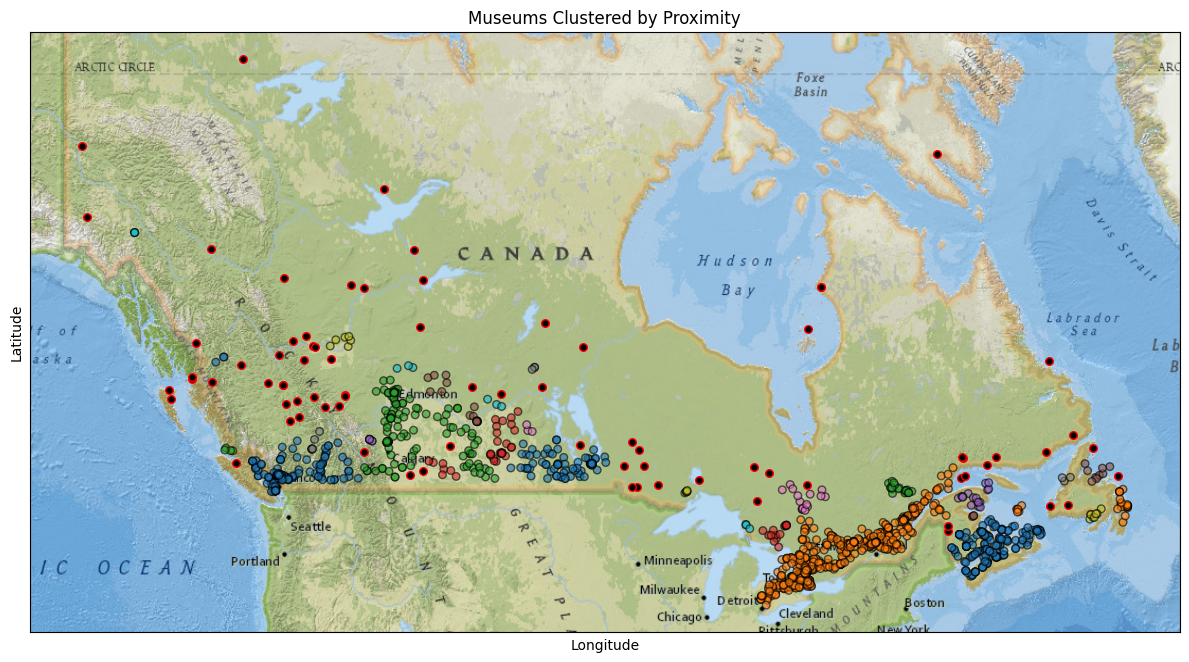

In [ ]:
# Plot the museums on a basemap of Canada, colored by cluster label.
# Using our function.

plot_clustered_locations(df, title='Museums Clustered by Proximity')

One key thing to notice here is that the clusters are not uniformly dense.

For example, the points are quite densely packed in a few regions but are relatively sparse in between.

DBSCAN agglomerates neighboring clusters together when they are close enough.

#### Build a HDBSCAN model

In [ ]:
min_samples=6
min_cluster_size=18
hdb = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric='euclidean')  # You can adjust parameters as needed

In [ ]:
# Assign labels
df['Cluster'] = hdb.fit_predict(coords_scaled)  # Another way to assign the labels

# Display the size of each cluster
df['Cluster'].value_counts()

Cluster
-1     649
 15     96
 19     86
 23     80
 10     57
 5      51
 0      51
 6      50
 20     46
 11     41
 21     39
 13     36
 17     33
 8      33
 4      25
 12     25
 14     25
 9      24
 22     23
 2      22
 1      21
 7      20
 3      19
 24     19
 18     18
 16     18
Name: count, dtype: int64

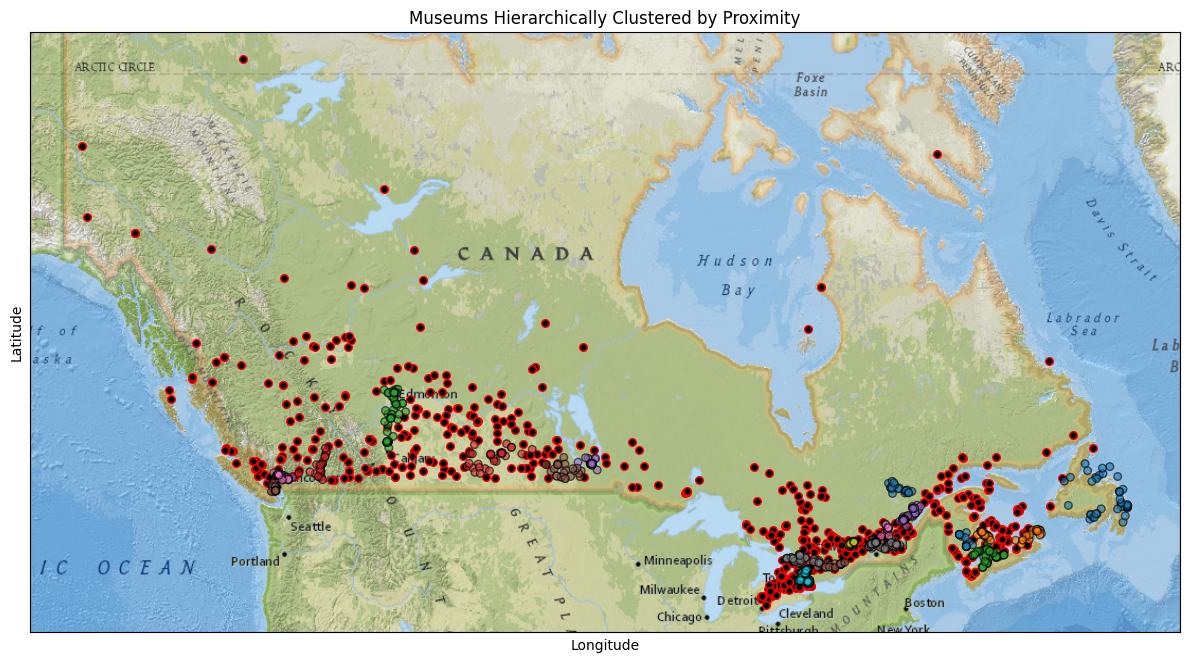

In [ ]:
# Plot the museum clusters
plot_clustered_locations(df, title='Museums Hierarchically Clustered by Proximity')

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a high-dimensional dataset into a lower-dimensional one by finding a new set of orthogonal (uncorrelated) variables called principal components, which capture the maximum variance in the data. Essentially, it identifies the most important patterns or directions in the data, allowing us to represent it with fewer features while retaining most of its original information.

We will explore how to implement two important applications of PCA.

1. How we can use PCA to project 2-D data onto its principal axes, meaning the two orthogonal directions that explain most of the variance in the data.

2. Project higher dimensional data down to a lower dimensional feature space. This is an example of dimension reduction, a powerful technique that can reduce our model-building computational load. PCA can help us filter out redundant, linearly correlated variables and reduce the amount of noise in the data.

### PCA to project 2-D data onto its principal axes,

In [ ]:
# Import Libaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#### Data

Let's create a 2-dimentional dataset, containing 2 linearly correlated features.
Using a bivarate normal distribuition.

In [ ]:
# Generate synthetic data

np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

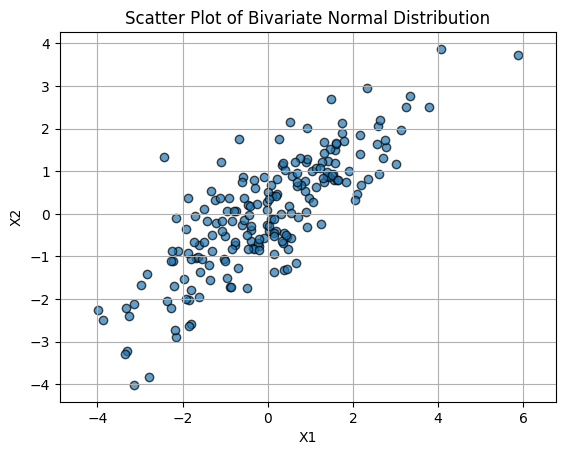

In [ ]:
# Scatter plot of the two features

plt.figure()
plt.scatter(X[:, 0], X[:, 1],  edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

#### PCA

In [ ]:
# initialize a 2-component PCA model with default parameters and then
# fit and transform the feature space

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Get the principal components

components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [ ]:
# The principal components are sorted in decreasing order by their
# explained variance, which can be expressed as a ratio.

pca.explained_variance_ratio_

#### Display Results

In [ ]:
# Project the data onto its principal component axes

projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [ ]:
# Now we can use them to represent the projections of each data point along
# the principal directions in the original feature space.

x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

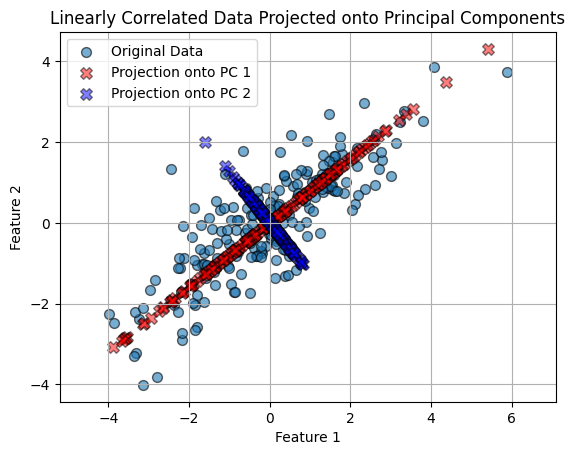

In [ ]:
# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### PCA for feature space dimensionality reduction

#### Data

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### PCA

In [ ]:
# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

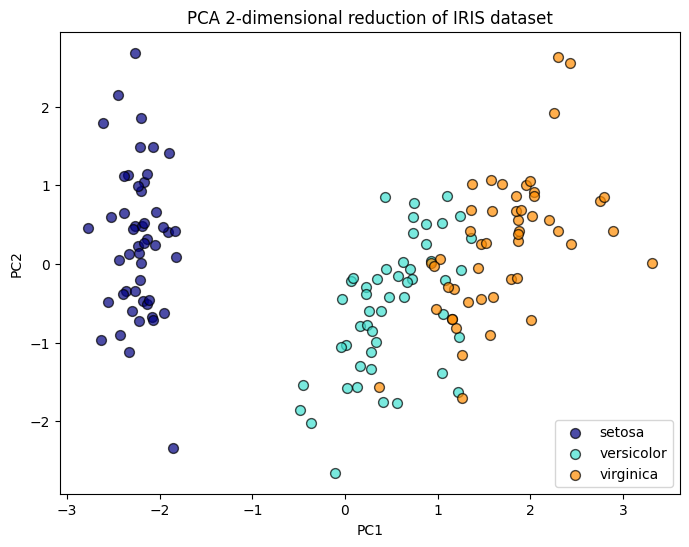

In [ ]:
# Plot the PCA-transformed data in 2D

plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [ ]:
# What percentage of the original feature space variance do these
# two combined principal components explain?

100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000166)

### Reinitialize the PCA model without reducing the dimension

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

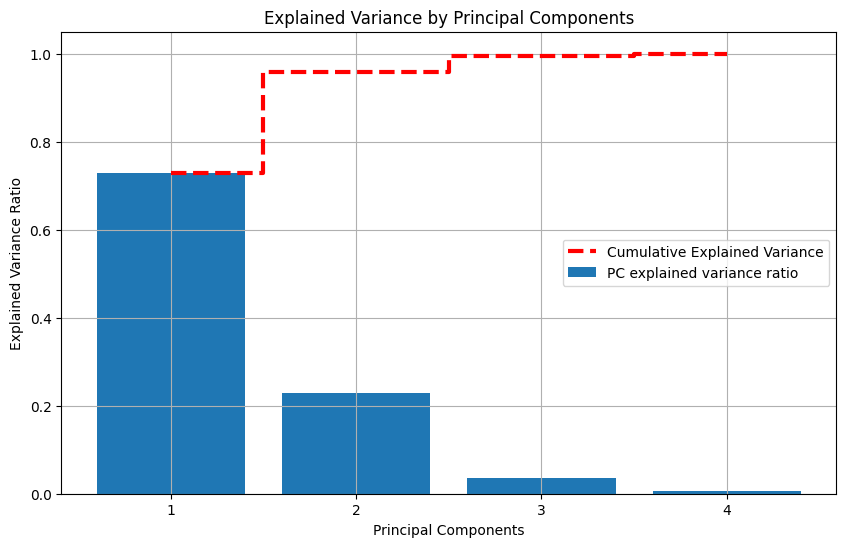

In [ ]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

## t-SNE and UMAP

The **t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a non-linear dimensionality reduction technique commonly used for visualizing high-dimensional datasets. It works by converting similarities between data points into joint probabilities and then minimizing the Kullback-Leibler divergence between the joint probabilities of the high-dimensional and low-dimensional representations. Essentially, t-SNE aims to preserve local structures within the data, meaning that points that are close together in the high-dimensional space remain close in the low-dimensional embedding, while points that are far apart are separated, making it particularly effective for exploring clusters and patterns in complex data.

**Uniform Manifold Approximation and Projection (UMAP)** is another non-linear dimensionality reduction technique, similar to t-SNE, but with some notable advantages. UMAP is built on a strong mathematical foundation rooted in Riemannian geometry and algebraic topology, which allows it to model the underlying manifold structure of the data. It constructs a high-dimensional graph representing the data's topological structure and then optimizes a low-dimensional embedding that preserves this structure as closely as possible. A key benefit of UMAP is its superior computational efficiency, making it much faster and more scalable than t-SNE for large datasets, while also generally doing a better job of preserving both local and global data structures.

 We are going to implement two advanced dimensionality reduction algorithms, tSNE and UMAP, on synthetic data. We'll compare the results to the same dimension reduction using PCA.

In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.datasets import make_blobs

In [2]:
# Generate synthetic data with four clusters in a 3D space

# CLuster centers:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Cluster standard deviations:
cluster_std=[1,1,2,3.5]

# Make the blobs and return the data and the blob labels
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

In [3]:
# Display the data in an interactive Plotly 3D scatter plot

# Create a DataFrame for Plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str) ,  opacity=0.7,  color_discrete_sequence=px.colors.qualitative.G10, title="3D Scatter Plot of Four Blobs")

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)  # Remove color bar, resize plot

fig.show()

In [4]:
# Standardize the data to prepare it for the three projection methods.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### t-SNE

In [5]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

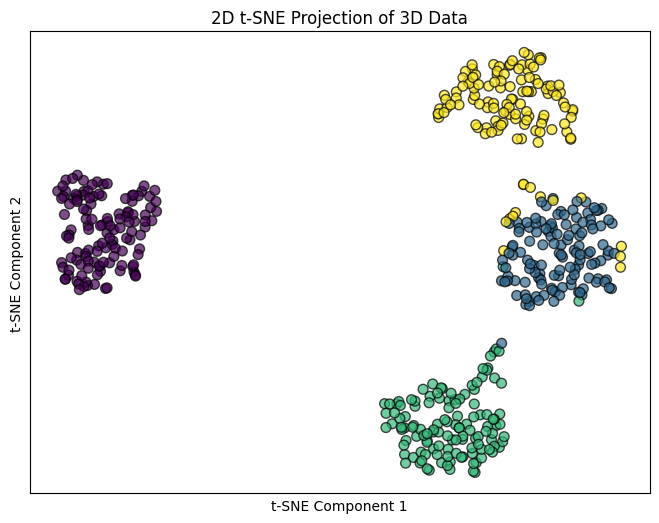

In [6]:
# PLOT

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### UMAP

In [7]:
# Apply UMAP to reduce the dimensionality to 2D
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1,n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



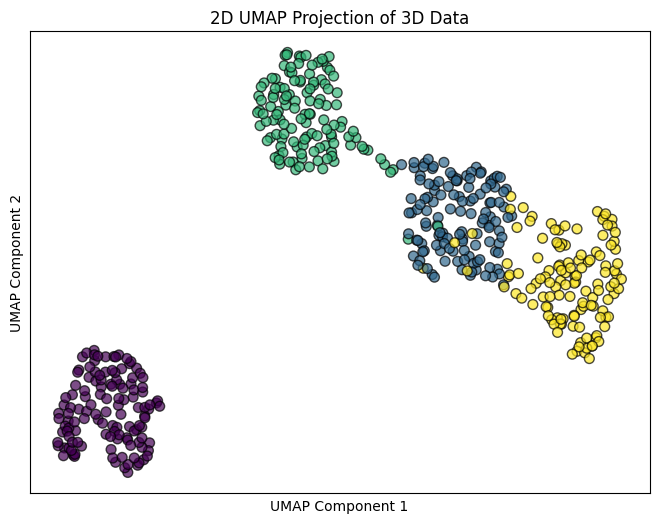

In [8]:
# Plot

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of 3D Data")
ax.set_xlabel("UMAP Component 1", )
ax.set_ylabel("UMAP Component 2", )
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### PCA

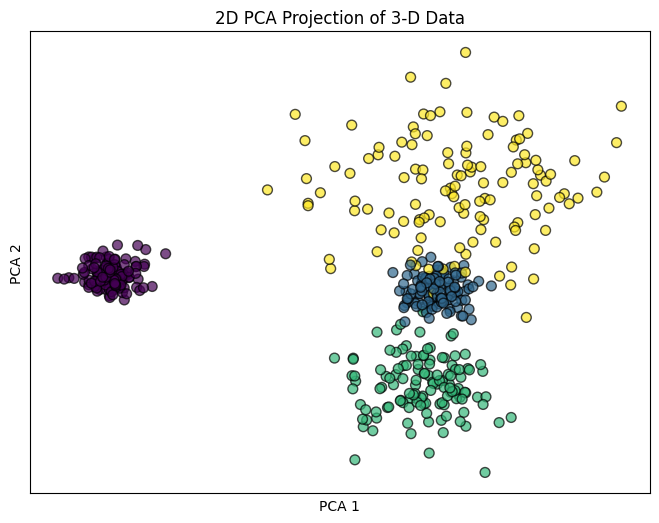

In [9]:
# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(8, 6))

# Plot the 2D PCA result (right)
ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title("2D PCA Projection of 3-D Data")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()